### sklearn을 통해 데이터를 표준화 및 정규화를 진행해봅시다.

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import missingno as msno
import koreanize_matplotlib

In [2]:
X = np.arange(7).reshape(-1,1)
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [4]:
from sklearn.preprocessing import StandardScaler

# StandardScaler = 데이터에 평균을 빼준 값
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-1.5],
       [-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ],
       [ 1.5]])

In [6]:
X2 = np.vstack([X, [[10000]]]) # vstack은 앞의 리스트에 값을 추가
X2

array([[    0],
       [    1],
       [    2],
       [    3],
       [    4],
       [    5],
       [    6],
       [10000]])

In [8]:
scaler.fit_transform(X2) # 방금 추가한 10000값 때문에 분포가 이상하게변하게됨

array([[-0.3788718 ],
       [-0.37856934],
       [-0.37826687],
       [-0.37796441],
       [-0.37766195],
       [-0.37735949],
       [-0.37705703],
       [ 2.64575089]])

만양 StandardScaler(평균값을 사용하는)를 사용했는데

Outlier(평균에서 멀리 떨어져있는 데이터값) 때문에 분포가 이상하게 변한다면!!

아래 방법 사용!!

In [9]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit_transform(X2)

array([[-1.00000000e+00],
       [-7.14285714e-01],
       [-4.28571429e-01],
       [-1.42857143e-01],
       [ 1.42857143e-01],
       [ 4.28571429e-01],
       [ 7.14285714e-01],
       [ 2.85614286e+03]])

In [12]:
# 여러개의 제곱이된 다항식으로 만들어줌
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit_transform(X)

array([[  0.,   0.,   0.],
       [  1.,   1.,   1.],
       [  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.],
       [  5.,  25., 125.],
       [  6.,  36., 216.]])

In [19]:
from sklearn.preprocessing import FunctionTransformer

X = 90*np.arange(9).reshape(-1, 1) # 각도를 표현한 X값
X

array([[  0],
       [ 90],
       [180],
       [270],
       [360],
       [450],
       [540],
       [630],
       [720]])

In [20]:
def sincos(X):
  x0 = np.sin(X*np.pi/180)
  x1 = np.cos(X*np.pi/180)
  X_new = np.hstack([x0, x1])
  return X_new

X2 = FunctionTransformer(sincos).fit_transform(X)
X2


array([[ 0.0000000e+00,  1.0000000e+00],
       [ 1.0000000e+00,  6.1232340e-17],
       [ 1.2246468e-16, -1.0000000e+00],
       [-1.0000000e+00, -1.8369702e-16],
       [-2.4492936e-16,  1.0000000e+00],
       [ 1.0000000e+00,  3.0616170e-16],
       [ 3.6739404e-16, -1.0000000e+00],
       [-1.0000000e+00, -4.2862638e-16],
       [-4.8985872e-16,  1.0000000e+00]])

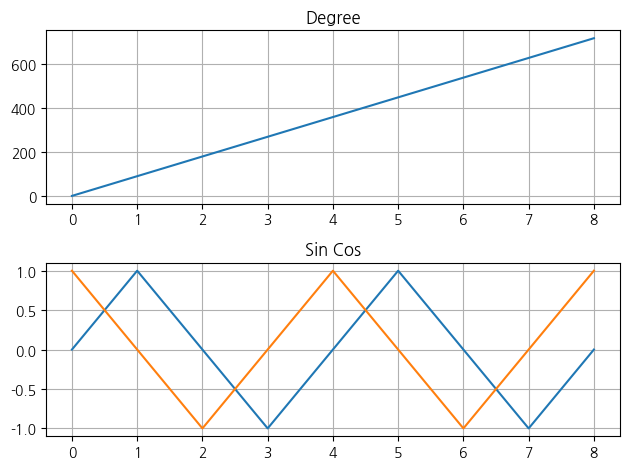

In [17]:
plt.subplot(211)
plt.plot(X)
# plt.yticks(X)
plt.title('Degree')
plt.grid()
plt.subplot(212)
plt.plot(X2)
plt.title('Sin Cos')
plt.tight_layout()
plt.grid()
plt.show()

In [18]:
X.flatten()

array([  0,  90, 180, 270, 360, 450, 540, 630, 720])